# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Описание проекта
Мы имеем данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.
Нам нужно определить рыночную стоимость объектов недвижимости.
Для этого проведем исследовательский анализ данных и установим параметры, влияющие на цену объектов. 

#### Последовательность выполнения проекта
1. Откроем файл с данными и изучим общую информацию
2. Выполним предобработку данных
3. Добавим в таблицу новые столбцы
4. Проведем исследовательский анализ данных
  - Изучим, как быстро продавались квартиры;
  - Определим факторы, которые больше всего влияют на общую (полную) стоимость объекта;
  - Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений;
  - Выделим квартиры в Санкт-Петербурге и вычислим их среднюю стоимость на разном удалении от центра
5. Напишем общий вывод

### 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd

In [2]:
try:
    data = pd.read_csv('C:\\Users\\User\\Desktop\\My_Jupiter\\real_estate_data.csv', sep = '\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')


In [3]:
print(data.head(5))    

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1       

#### Выводим информацию о данных


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Строим гистограмму

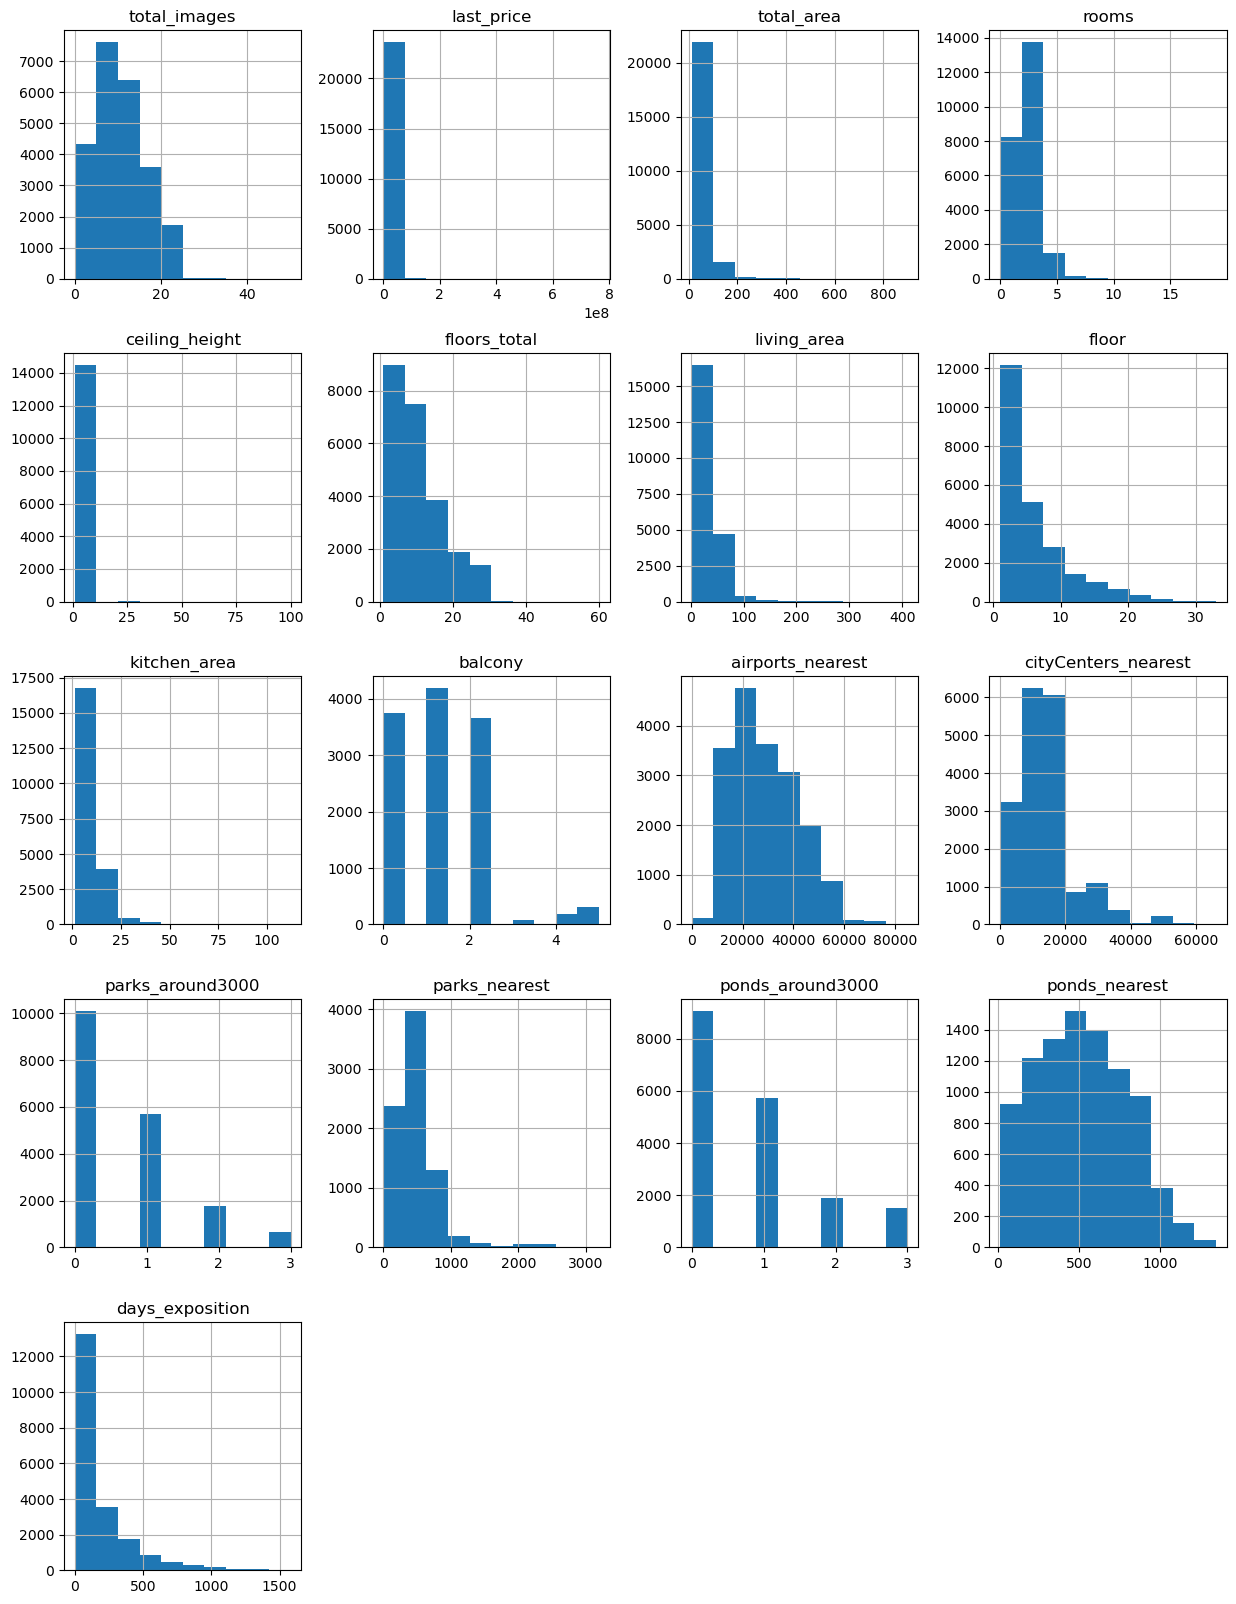

In [5]:
import matplotlib.pyplot as plt
data.hist(figsize=(15, 20))
plt.show()

<a id='intro'></a>

**Описание исходных данных**

В исходном датасете 23699 строк, 4 типа данных: bool(2), float64(14), int64(3), object(3), есть пропущенные значения, есть данные, тип которых нужно изменить, есть неровномерно распределенные данные

### 2. Выполните предобработку данных

### Удаление пропусков
#### Выводим количество пропущенных значений для каждого столбца. Комбинация двух методов.

In [6]:
data.isna().sum()


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### Заменим пропущенные значения в столбцы 'balcony', 'parks_around3000', 'ponds_around3000' на ноль, возможно проавец забыл указать что в продаваемых квартирах нет балконов, а также нет поблизости парков и водоемов

In [7]:
data['balcony']=data['balcony'].fillna(0)
data['parks_around3000']=data['parks_around3000'].fillna(0)
data['ponds_around3000']=data['ponds_around3000'].fillna(0)


#### Заменим на 0 для типов квартир 'studio' пропущенные значения в 'kitchen_area', т. к. в таких квартирах кухня объеденена с комнатой

In [8]:
data.loc[data['studio'] == 1, 'kitchen_area'] = 0
data['kitchen_area'].isna().sum()


2129

#### Удалим пропущенные значения в 'floors_total ', т. к. количество пропущенных значений не очень большое

In [9]:
data = data.dropna(subset=['floors_total'])
data['floors_total'].isna().sum()


0

#### Заменим все пропуски в 'is_apartment' на значение False, т. е. "не аппартаменты", т. к. такое большое количество пропусков вероятно означает, что продавцы просто не отметили, что это квартиры

In [10]:

data['is_apartment'].fillna(False, inplace=True)
data['is_apartment'].isna().sum()

0

#### Заполним пропуски 'living_area' значением median() в зависимости от количества комнат 'rooms'

In [11]:
for m in data['rooms'].unique():
    data.loc[(data['rooms'] == m) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == m), 'living_area'].median()
data['living_area'].isna().sum()    



0

#### Заполним пропуски в 'kitchen_area' значение median() в зависимости от количества комнат 'rooms'

In [12]:
for k in data['rooms'].unique():
    data.loc[(data['rooms'] == k) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['rooms'] == k), 'kitchen_area'].median()
data['kitchen_area'].isna().sum()    


0

#### Удалим строки, где количество комнат < 1

In [13]:
data = data[data['rooms']>=1]

#### Заменим названия населенных пунктов

In [14]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [15]:
data['locality_name'] = (
    data['locality_name']
    .replace(['городской посёлок', 'поселок городского типа'], 'посёлок городского типа', regex=True)
    .replace(['поселок станции'], 'поселок при железнодорожной станции', regex=True)
    .replace(['садоводческое некоммерческое товарищество'], 'садовое товарищество', regex=True)
    
)

# Удаление дубликатов 'поселок'
#data['locality_name'] = data['locality_name'].str.replace('поселок поселок', 'поселок', regex=True)


In [16]:
data['locality_name'] = (
    data['locality_name']
    .replace(['селок'], 'сёлок', regex=True)
    
)


#### Проверим новый список названий

In [17]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары',
       'посёлок городского типа Янино-1', 'посёлок Парголово',
       'посёлок Мурино', 'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин',
       'деревня Кудрово', 'Коммунар', 'Колпино',
       'посёлок городского типа Красный Бор', 'Гатчина',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'посёлок Молодцово',
       'посёлок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'посёлок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'посёлок Торковичи', 'посёлок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посёл

##### Удаляем дубликаты

In [18]:
data['locality_name'] = data['locality_name'].str.replace('посёлок при железнодорожной посёлок при при железнодорожной станции', 'посёлок при железнодорожной станции')
#data.drop_duplicates(subset=['locality_name'], keep='first', inplace=True)

In [19]:
data['locality_name'] = data['locality_name'].str.replace('посёлок посёлок при при железнодорожной станции', 'посёлок при железнодорожной станции')



In [20]:
data['locality_name'] = data['locality_name'].str.replace('деревня Кудрово', 'Кудрово')

In [21]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары',
       'посёлок городского типа Янино-1', 'посёлок Парголово',
       'посёлок Мурино', 'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин',
       'Кудрово', 'Коммунар', 'Колпино',
       'посёлок городского типа Красный Бор', 'Гатчина',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'посёлок Молодцово',
       'посёлок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'посёлок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'посёлок Торковичи', 'посёлок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посёлок Новый

#### Заменим для пропущенных значений в 'locality_name' на "Санкт-Петербург", т. к. это наиболее вероятно

In [22]:
data['locality_name'] = data['locality_name'].fillna('Санкт-Петербург')


### Обработка и удаление аномальных значений

In [23]:
print(data['ceiling_height'].unique())
data['ceiling_height'].value_counts()


[  2.7     nan   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     2.65   3.2    2.61   3.25   3.45   2.77   2.85
   2.64   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84
   3.1    2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.
   2.58   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6
   2.92   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53
   2.74   2.96   2.46   5.3    5.     2.79   2.95   4.06   2.94   3.82
   3.54   3.53   2.83   4.7    2.4    3.38   3.01   5.6    3.65   3.9
   3.18   3.35   2.3    3.57   2.48   2.62   2.82   3.98   2.63   3.83
   3.52   3.95   3.75   2.88   3.67   3.87   3.66   3.85   3.86   4.19
   3.24   4.8    4.5    4.2    3.36  32.     3.08   3.68   3.07   3.37
   3.09   8.     3.26   3.34   2.81   3.44   2.97   3.14   4.37   2.68
   3.22   3.27   4.1    2.93   3.46  24.     3.47   3.33  27.     3.63
   3.32  26.     1.2    8.3    2.98   2.86   3.17   4.4    3.28   3.04
   4.45   5

ceiling_height
2.50    3513
2.60    1637
2.70    1551
3.00    1108
2.55     979
        ... 
5.00       1
4.65       1
4.37       1
4.06       1
3.59       1
Name: count, Length: 182, dtype: int64

#### Заменим двузначные числа, т. е. вероятно неправильно поставлен разряд чисел

In [24]:
correction_dict = {
    32.0: 3.2,
    25.0: 2.5,
    27.0: 2.7,
    26.0: 2.6,
    22.6: 2.26,
    24.0: 2.4,
    3.0: 3.00,
    4.0: 4.00,
    5.0: 5.00,
    6.0: 6.00,
    27.5: 2.75,
    8.0: 8.00,
    1.2: 2.5,  
    8.3: 8.00,
    14.0: 14.00,
    100.0: None  
}


#### Удалим значения, где 'ceiling_height ' > 5.0, т. к. их общее количество не повляет существенно на данные

In [25]:
data.drop(data[data['ceiling_height'] > 5.0].index, inplace=True)
print(data['ceiling_height'].value_counts())
data['ceiling_height'].isna().sum()

ceiling_height
2.50    3513
2.60    1637
2.70    1551
3.00    1108
2.55     979
        ... 
3.84       1
3.43       1
4.30       1
3.39       1
3.59       1
Name: count, Length: 164, dtype: int64


9006

#### Заменим все пропущенные значения в 'ceiling_height' на median()

In [26]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())


#### Заменим тип некоторых данных на int, т. к. это целочисленные значения, для 'is_apartment' на bool, т. к. там только два значения

In [27]:
data['floors_total'] = data['floors_total'].astype('int64')
data['balcony'] = data['balcony'].astype('int64')
data['parks_around3000'] = data['parks_around3000'].astype('int64')
data['ponds_around3000'] = data['ponds_around3000'].astype('int64')
data['is_apartment'] = data['is_apartment'].astype('bool')
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 23385 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23385 non-null  int64  
 1   last_price            23385 non-null  float64
 2   total_area            23385 non-null  float64
 3   first_day_exposition  23385 non-null  object 
 4   rooms                 23385 non-null  int64  
 5   ceiling_height        23385 non-null  float64
 6   floors_total          23385 non-null  int64  
 7   living_area           23385 non-null  float64
 8   floor                 23385 non-null  int64  
 9   is_apartment          23385 non-null  bool   
 10  studio                23385 non-null  bool   
 11  open_plan             23385 non-null  bool   
 12  kitchen_area          23385 non-null  float64
 13  balcony               23385 non-null  int64  
 14  locality_name         23385 non-null  object 
 15  airports_nearest      17

In [28]:
print(data['first_day_exposition'].head(5))

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
Name: first_day_exposition, dtype: object


#### Заменим тип данных для 'first_day_exposition', потому что это дата размещения объявления

In [29]:
import pandas as pd
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S',errors='coerce')

print(data['first_day_exposition'].head(5))

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]


In [30]:
data['last_price_old']=data['last_price']

In [31]:
data['last_price'] = data['last_price']/1000000

In [32]:
print(data.head(10))

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20      13.000      108.00           2019-03-07      3   
1             7       3.350       40.40           2018-12-04      1   
2            10       5.196       56.00           2015-08-20      2   
3             0      64.900      159.00           2015-07-24      3   
4             2      10.000      100.00           2018-06-19      2   
5            10       2.890       30.40           2018-09-10      1   
6             6       3.700       37.30           2017-11-02      1   
7             5       7.915       71.60           2019-04-18      2   
8            20       2.900       33.16           2018-05-23      1   
9            18       5.400       61.00           2017-02-26      3   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70            16        51.00      8         False  ...   
1            2.65            11        18.60      1         False  ...

[Описание исходных данных](#intro)

In [33]:
# Ищем строки-дубликаты
data.duplicated().sum()


0

In [34]:
# Выведем информацию об обновленных данных и сравним с исходными
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23385 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23385 non-null  int64         
 1   last_price            23385 non-null  float64       
 2   total_area            23385 non-null  float64       
 3   first_day_exposition  23385 non-null  datetime64[ns]
 4   rooms                 23385 non-null  int64         
 5   ceiling_height        23385 non-null  float64       
 6   floors_total          23385 non-null  int64         
 7   living_area           23385 non-null  float64       
 8   floor                 23385 non-null  int64         
 9   is_apartment          23385 non-null  bool          
 10  studio                23385 non-null  bool          
 11  open_plan             23385 non-null  bool          
 12  kitchen_area          23385 non-null  float64       
 13  balcony              

**Результат преобразования данных**

Исходные данные были преобразованы:
- Изменение типа данных:

Столбец first_day_exposition был преобразован в тип данных datetime64. Такое преобразование обеспечивает более удобную работу с датами и временем.
Столбец floors_total был изменен на целочисленный тип данных int64, вероятно, потому что количество этажей обычно представляет собой целые числа.
Также столбец balcony был изменен на целочисленный тип данных int64.

- Добавление новых признаков:

Добавлены столбцы last_price_old (это копия цены), metr_price (цена за квадратный метр), day_exp, month_exp, year_exp.

- Удаление пропущенных значений:

Количество наблюдений в DataFrame уменьшилось с 23699 до 22485. Это связано с тем, что в новом DataFrame были удалены строки с отсутствующими значениями в различных столбцах.

- Изменение структуры данных:

Столбец is_apartment теперь имеет тип данных bool.
Столбцы studio и open_plan теперь также имеют тип данных bool.

- Обновление структуры данных:

Был добавлен новый столбец floor_type с категориальным типом данных.

- Изменение количества уникальных значений:

Некоторые столбцы, такие как parks_around3000, ponds_around3000, были преобразованы в целочисленный тип, и теперь они содержат количество парков и прудов вокруг объекта недвижимости.

Некоторые столбцы всё ещё содержат пропущенные значения, такие как airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest, days_exposition. Необходимо внимательно рассмотреть их при анализе данных.



### 3. Добавьте в таблицу новые столбцы

##### Цена одного квадратного метра 

In [35]:
# Цена 1 кв. м общей площади
data['metr_price'] = round(data['last_price']/data['total_area'], 2)
data['metr_price'] = data['metr_price']*1000000
print(data['metr_price'].head(5))

0    120000.0
1     80000.0
2     90000.0
3    410000.0
4    100000.0
Name: metr_price, dtype: float64


##### День недели публикации объявления (0 — понедельник, 1 — вторник и так далее)

In [36]:
data['day_exp'] = data['first_day_exposition'].dt.weekday


##### Mесяц публикации объявления

In [37]:
data['month_exp'] = data['first_day_exposition'].dt.month


##### Год публикации объявления

In [38]:
data['year_exp'] = data['first_day_exposition'].dt.year


##### Тип этажа квартиры (значения — «первый», «последний», «другой»)

In [39]:
floor_type = ['первый', 'последний', 'другой']
data['floor_type'] = pd.Series(floor_type).apply(lambda x:x)
data['floor_type']=data['floor_type'].astype('category')


In [40]:
print(data['floor_type'].unique())

['первый', 'последний', 'другой', NaN]
Categories (3, object): ['другой', 'первый', 'последний']


##### Расстояние до центра города в километрах 

In [41]:
data['cityCenters_nearest'] = (data['cityCenters_nearest']/1000).round()


### 4. Проведите исследовательский анализ данных

#### Построим гистограммы

##### Удалим строки, где общая площадь < 200, т. к. количество таких строк менее 10 %

In [42]:
print((data['total_area']>200).sum())


222


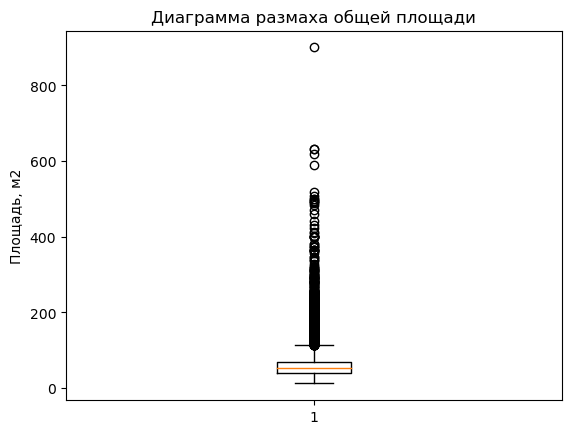

In [43]:
import matplotlib.pyplot as plt
plt.boxplot(data['total_area'])
plt.title('Диаграмма размаха общей площади')
plt.ylabel('Площадь, м2')
plt.show()


In [44]:
data = data[data['total_area']<200]

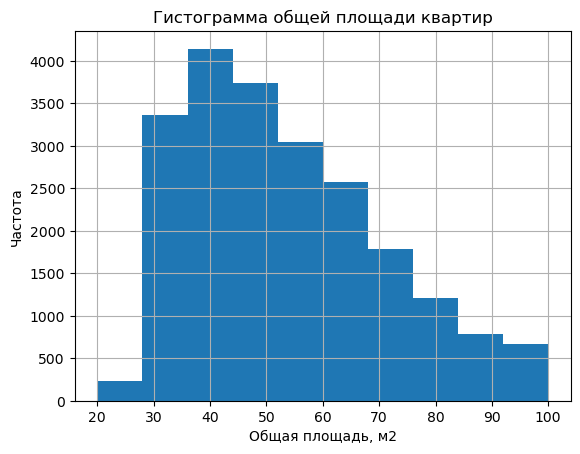

In [45]:
data['total_area'].hist(bins=10, range=(20, 100))
plt.title('Гистограмма общей площади квартир')
plt.xlabel('Общая площадь, м2')
plt.ylabel('Частота')
plt.show()


Наибольшее количество продаваемых квартир общей площадью 30-40 кв. м, вероятно это однокомнатные квартиры, они всегда пользуются спросом. Далее идут квартиры площадью 45-52 кв. м, это вероятно небольшие двухкомнатные картиры, затем квартиры площадью до 50-67 кв. м, это большие двушки или трёшки. Затем идет снижение спроса на большие квартиры, т. к. они существенно дороже.

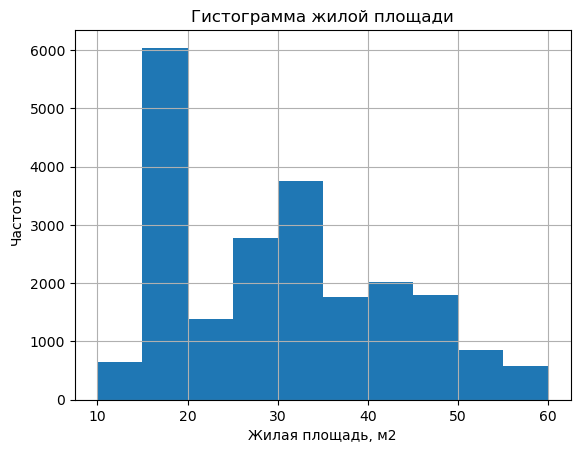

In [46]:
data['living_area'].hist(bins=10, range=(10,60))
plt.title('Гистограмма жилой площади')
plt.xlabel('Жилая площадь, м2')
plt.ylabel('Частота')
plt.show()


Что касается жилой площади, то она коррелирует с общей площадью квартиры: на первом месте: квартиры c жилой площадью 12-50 кв. м - это однушки; на втором: 30-45 кв. м - двушки; на третьем 25-30 кв. м - возможно студии или маленькие двушки, на четвертом: более 40 кв. м - трёшки и более. Таким образом, подтверждается распределение по популярности продаваемых квартир: однокомнатные, двухкомнатные, трехкомнатные, студии, большие квартиры.

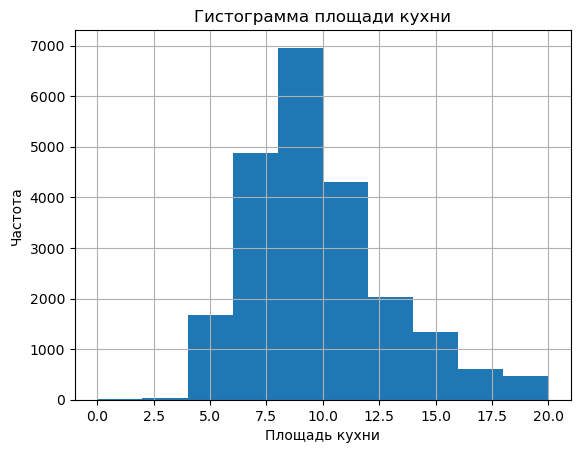

In [47]:
data['kitchen_area'].hist(bins=10, range=(0, 20))
plt.title('Гистограмма площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Частота')
plt.show()


Площадь кухни не зависит напрямую от площади квартиры, т. к. современные стандарты жилья предполагают достаточно большую кухню, независимо от площади квартиры. Самый популярный размер 7.5-10 кв. м; на втором месте: кухни 5.5-7.5 кв. м, вероятно хрущёвки; на третьем месте: кухни 10-12 кв. м. Далее примерно в равных долях очень маленькие кухни и большие.

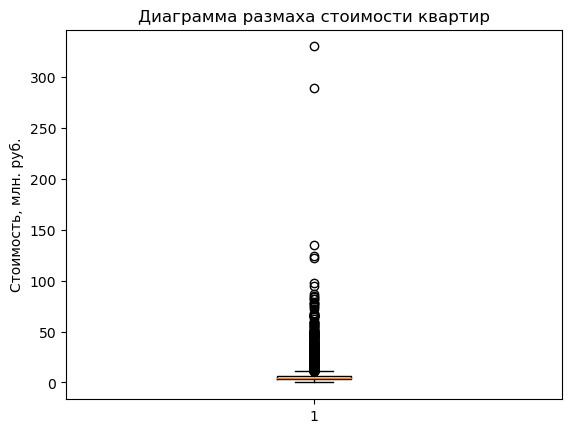

In [48]:
plt.boxplot(data['last_price'])
plt.title('Диаграмма размаха стоимости квартир')
plt.ylabel('Стоимость, млн. руб.')
plt.show()

In [49]:
data['last_price'].describe()

count    23159.000000
mean         6.041519
std          6.207042
min          0.012190
25%          3.450000
50%          4.600006
75%          6.700000
max        330.000000
Name: last_price, dtype: float64

<Axes: >

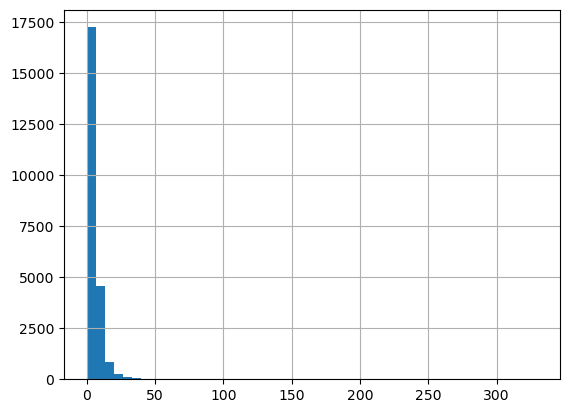

In [50]:
data['last_price'].hist(bins=50)

##### Удалим строки, где 'last_price' < 18 000 000 руб., т. к. таких объектов немного

In [51]:
data = data[data['last_price']<18]

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22485 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22485 non-null  int64         
 1   last_price            22485 non-null  float64       
 2   total_area            22485 non-null  float64       
 3   first_day_exposition  22485 non-null  datetime64[ns]
 4   rooms                 22485 non-null  int64         
 5   ceiling_height        22485 non-null  float64       
 6   floors_total          22485 non-null  int64         
 7   living_area           22485 non-null  float64       
 8   floor                 22485 non-null  int64         
 9   is_apartment          22485 non-null  bool          
 10  studio                22485 non-null  bool          
 11  open_plan             22485 non-null  bool          
 12  kitchen_area          22485 non-null  float64       
 13  balcony              

##### Построим гистограмму стоимости

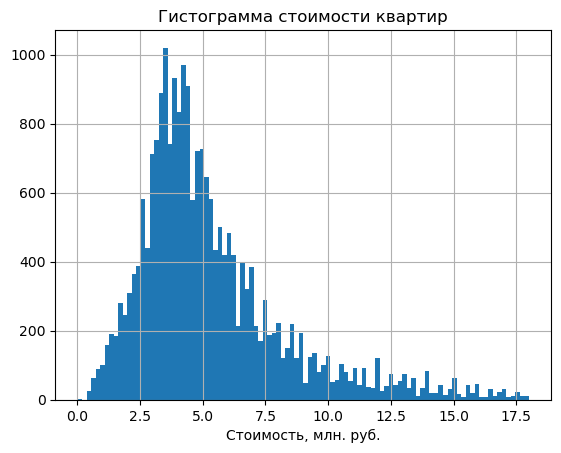

In [53]:
(data['last_price']).hist(bins=100)
plt.title('Гистограмма стоимости квартир')
plt.xlabel('Стоимость, млн. руб.')
plt.show()


Гистограмма цены имеет нормальное распредедление с небольшим "хвостом" в сторону увеличения цены. Основная доля продаваемых квартир идет по цене 3,5 до 5 млн. рублей, это как раз однушки. Примерно в равных долях продаются маленькие квартиры до 2,5 млн. руб. и двушки по цене 6-8 млн. рублей. Дорогих квартир меньше и  разброс цены больше

##### Построим гистограмму по количеству комнат

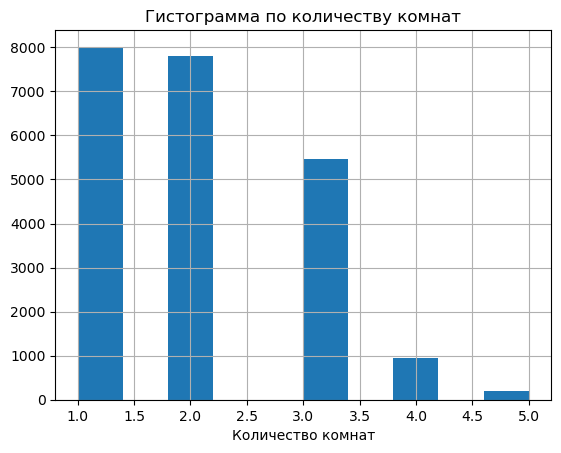

In [54]:
data['rooms'].hist(bins=10, range=(1,5))
plt.title('Гистограмма по количeству комнат')
plt.xlabel('Количество комнат')
plt.show()


Эта гистограмма подверждает гипотезу, что больше всех продается одно- и двух комнатных квартир, далее идут трешки. Вероятно студии попали в число однушек, т. к. они состоят из одной комнаты.

##### Построим гистограмму высоты потолков

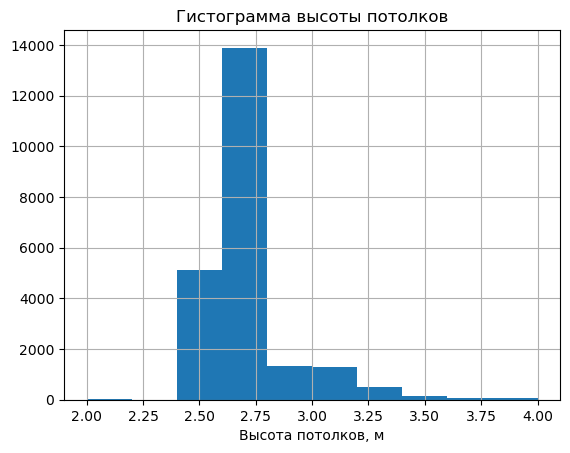

In [55]:
data['ceiling_height'].hist(bins=10, range=(2,4))
plt.title('Гистограмма высоты потолков')
plt.xlabel('Высота потолков, м')
plt.show()


Наибольшее количество продаваемых квартир имеет высоту потолков 2.75 м, на втором месте квартиры с высотой до 2.5 м, вероятно это хрущевки, на третьем месте квартиры с потолками выше 2.8-3 м, вероятно это бизнес-класс, совсем немного квартир с потолком выше 3.5 м, вероятно это старый фонд

##### Зададим тип этажа и построим гистограмму

In [56]:
def cat_floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый', 0
    elif floor == floors_total:
        return 'последний', 2
    else:
        return 'другой', 1

# Примененим функцию 
data[['floor_type', 'floor_num']] = data.apply(cat_floor_type, axis=1, result_type='expand')

print(data[['floor_type', 'floor_num']].head())

  floor_type  floor_num
0     другой          1
1     первый          0
2     другой          1
4     другой          1
5     другой          1


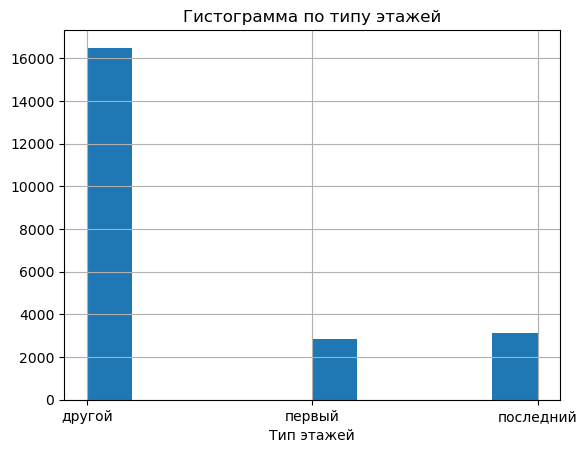

In [57]:
data['floor_type'].hist(bins=10)
plt.title('Гистограмма по типу этажей')
plt.xlabel('Тип этажей')
plt.show()


Как видно из графика, квартиры на первом и на последнем этажах продаются примерно в одинаковом количестве, но значительно меньше,чем квартиры на других этажах 

##### Построим гистограмму общегоо количества этажей в доме

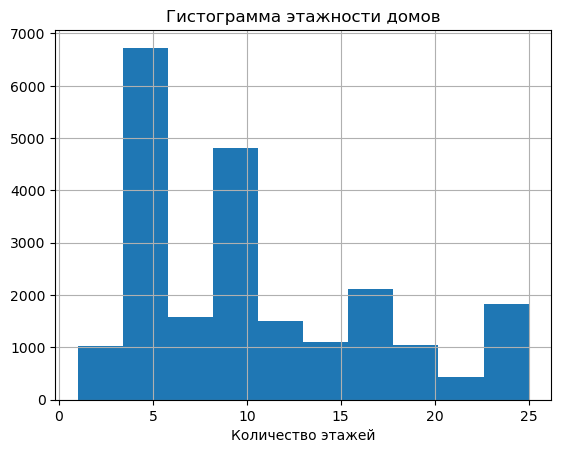

In [58]:
data['floors_total'].hist(bins=10, range=(1,25))
                          
plt.title('Гистограмма этажности домов')
plt.xlabel('Количество этажей')
plt.show()


Большинство квартир продаются в 5-ти этажных домах, но возможно это связано с тем, что количество квартир в 5-ти этажном доме значительно меньше, чем в многоэтажке, поэтому количество 5-ти этажек в принципе больше. На втором месте 8-12 этажные дома, далее идут дома, выше 12-ти этажей

##### Построим гистограмму расстояния до центра города

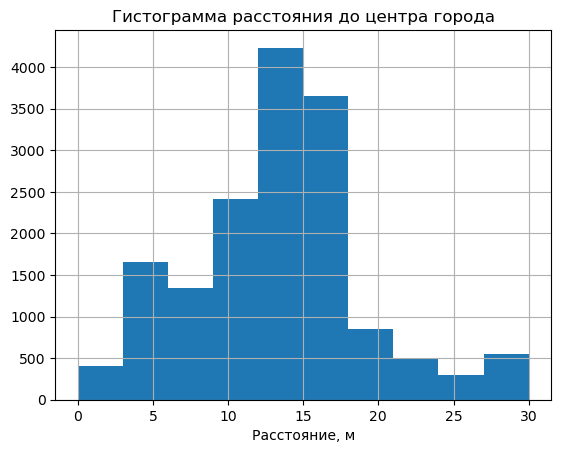

In [59]:
data['cityCenters_nearest'].hist(bins=10, range=(0,30))
plt.title('Гистограмма расстояния до центра города')
plt.xlabel('Расстояние, м')

plt.show()


Большинство квартир продается в радиусе 12-18 км от центра города, что соответсвует плотной городской застройке. На втором месте радиус 6-12 км, далее идут квартиры в центре. На последнем месте квартиры в радиусе более 20-40 км от центра, вероятно это уже пригородное жилье

##### Построим гистограмму расстояния до ближайшего парка

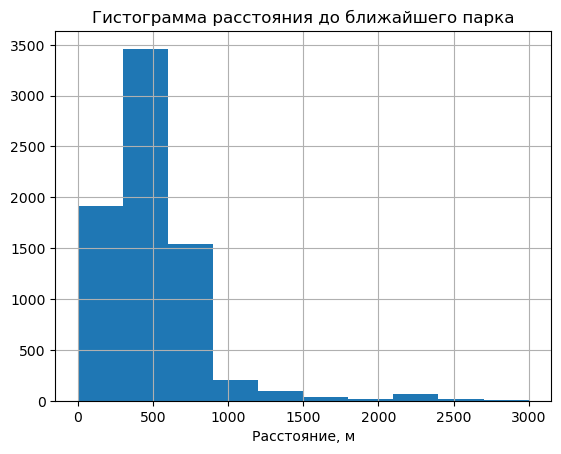

In [60]:
data['parks_nearest'].hist(bins=10, range=(0,3000))
plt.title('Гистограмма расстояния до ближайшего парка')
plt.xlabel('Расстояние, м')
plt.show()


Большинство квартир расположено недалеко от парков 300-600 м, половина от этого числа расположена буквально вблизи от парков - менее 500 м, примерно столько же в районе 600-1000 м и совсем немного квартир находятся вдалеке от парков

#### Изучим как быстро продавались квартиры

In [61]:

print(data['days_exposition'].describe())


count    19590.000000
mean       178.074987
std        216.558730
min          1.000000
25%         45.000000
50%         94.000000
75%        227.000000
max       1580.000000
Name: days_exposition, dtype: float64


- Среднее время продаж: 

Среднее время продажи квартир составляет около 178 дней, что может служить ориентиром для общего представления о рыночной активности.

- Быстрые продажи: 

Продажи, завершившиеся менее чем за 45 дней (25-й процентиль), могут считаться быстрыми. Это свидетельствует о высокой востребованности таких объектов.

- Долгие продажи:

Продажи, занимающие более 227 дней (75-й процентиль), могут считаться необычно долгими. Эти объекты могут сталкиваться с более длительным временем ожидания покупателей.

- Средние продажи:

Продажи, завершившиеся между 45 и 94 днями (интерквартильный диапазон), можно считать средними по времени. Это находится в середине распределения и может отражать типичные сроки продаж.

### Определим факторы, которые больше всего влияют на общую (полную) стоимость объекта

##### Зависимость стоимости от общей площади

In [62]:
# Создаем сводную таблицу с медианными ценами для каждой общей площади
import numpy as np
price_total_living = data.pivot_table(index='total_area', values='last_price', aggfunc='median')
print(price_total_living.head(5))

            last_price
total_area            
12.0             2.400
13.0             1.850
13.2             1.686
14.0             1.190
15.0             1.725


<Axes: >

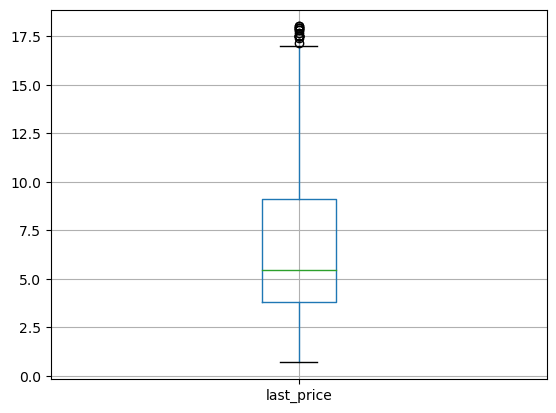

In [63]:
# Строим диаграмму размаха
price_total_living.boxplot()

In [64]:
print(price_total_living.describe())

        last_price
count  1817.000000
mean      6.814493
std       3.904247
min       0.690000
25%       3.790000
50%       5.425000
75%       9.080000
max      17.998000


In [65]:
# Посчитаем корреляцию Пирсона
correlation_total = data['total_area'].corr(data['last_price'])
print(correlation_total)

0.7644140829506829


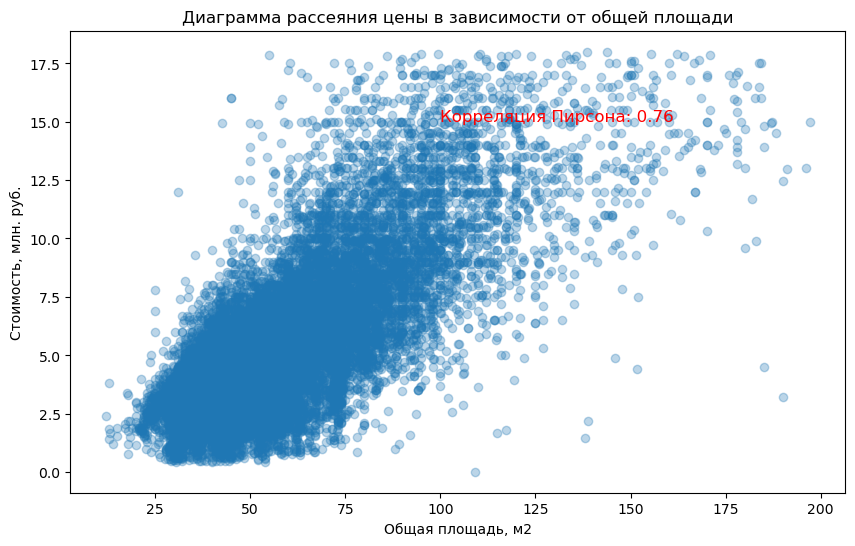

In [66]:
plt.figure(figsize=(10, 6))
plt.scatter(data['total_area'], data['last_price'], alpha=0.3)
plt.title('Диаграмма рассеяния цены в зависимости от общей площади')
plt.xlabel('Общая площадь, м2')
plt.ylabel('Стоимость, млн. руб.')
plt.text(100, 15, f'Корреляция Пирсона: {correlation_total:.2f}', fontsize=12, color='red')
plt.show()

Средняя цена 1 кв.м общей площади жилья 5.74 млн. руб., медиана 4.9 млн., это говорит о том, что доля более дешевого жилья больше, чем доля более дорого. Это подтверждает и смещение медианы к левому краю. В тоже время в зоне есть максимума есть выбросы, которые свидетельствуют о наличии дорогих картир. 

Коэффициент корреляции Пирсона равный 0.76 указывает на довольно сильную положительную линейную зависимость между общей площадью и ценой. Это означает, что, как правило, с увеличением общей площади квартиры увеличивается её цена, и наоборот.

В данном случае, значение 0.76 говорит о том, что большие квартиры, как правило, имеют более высокую стоимость, и наоборот, меньшие квартиры имеют более низкую стоимость. 

##### Зависимость цены от жилой площади

In [67]:
# Создаем сводную таблицу с медианными ценами для каждой жилой площади
price_living_area = data.pivot_table(index='living_area' , values='last_price', aggfunc='median')
print(price_living_area.head(5))


             last_price
living_area            
2.0               6.350
3.0               4.440
5.4               6.100
6.0               3.799
6.5               4.050


In [68]:
print(price_living_area.describe())

        last_price
count  1520.000000
mean      6.931039
std       3.696650
min       0.990000
25%       4.050000
50%       5.800000
75%       9.052597
max      17.998000


<Axes: >

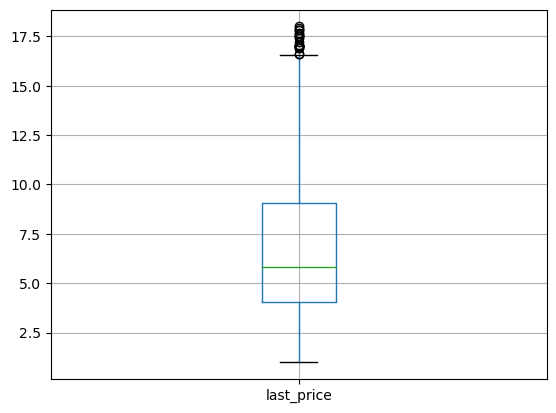

In [69]:
price_living_area.boxplot()

In [70]:
# Посчитаем корреляцию Пирсона
correlation_living = data['living_area'].corr(data['last_price'])
print(correlation_living)

0.631722881814197


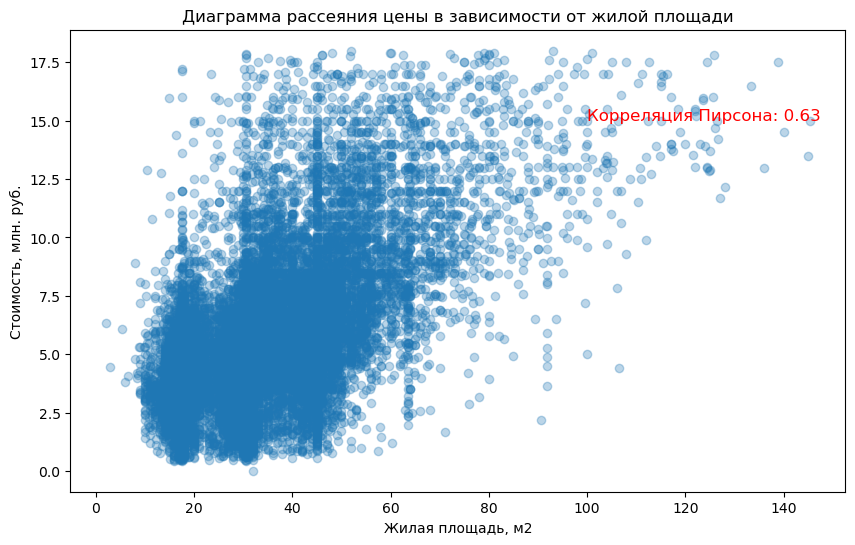

In [71]:
# Строим диаграмму рассеяния
plt.figure(figsize=(10, 6))
plt.scatter(data['living_area'], data['last_price'], alpha=0.3)
plt.title('Диаграмма рассеяния цены в зависимости от жилой площади')
plt.xlabel('Жилая площадь, м2')
plt.text(100, 15, f'Корреляция Пирсона: {correlation_living:.2f}', fontsize=12, color='red')
plt.ylabel('Стоимость, млн. руб.')
plt.show()



Средняя цена 1 кв.м общей жилой площади 6.04 млн. руб., медиана 5.3 млн., это говорит о том, что доля более дешевого жилья больше, чем доля более дорого. Это подтверждает и смещение медианы к левому краю. В тоже время в зоне есть максимума есть выбросы, которые свидетельствуют о наличии дорогих картир.

Коэффициент корреляции Пирсона равный 0.63 говорит о том, что в целом, при увеличении площади жилой комнаты, цена квартиры имеет тенденцию к увеличению, и наоборот. Однако, по сравнению с общей площадью (где корреляция была 0.76), зависимость в данном случае менее сильная.

##### Зависимость цены от площади кухни

In [72]:
# Создаем сводную таблицу с медианными ценами для каждой площади кухни
price_kitchen_area = data.pivot_table(index='kitchen_area' , values='last_price', aggfunc='median')
print(price_kitchen_area.head(5))
print()


              last_price
kitchen_area            
0.0                 2.65
1.3                 4.25
2.0                 2.72
2.3                 2.94
2.4                 2.20



In [73]:
print(price_kitchen_area.describe())

       last_price
count  858.000000
mean     6.698976
std      3.688640
min      0.012190
25%      3.956250
50%      5.600000
75%      8.637500
max     17.807836


<Axes: >

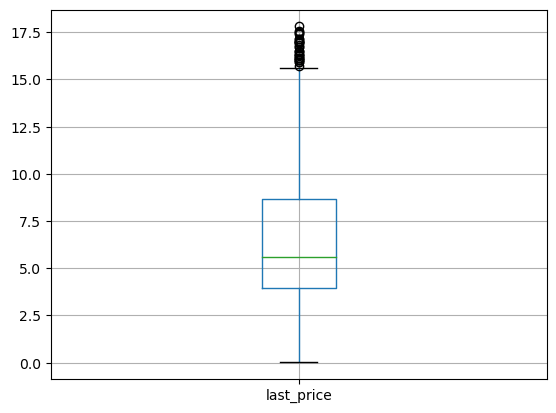

In [74]:
price_kitchen_area.boxplot()

In [75]:
# Посчитаем корреляцию Пирсона
correlation_kitchen = data['kitchen_area'].corr(data['last_price'])
print(correlation_kitchen)

0.542652408684693


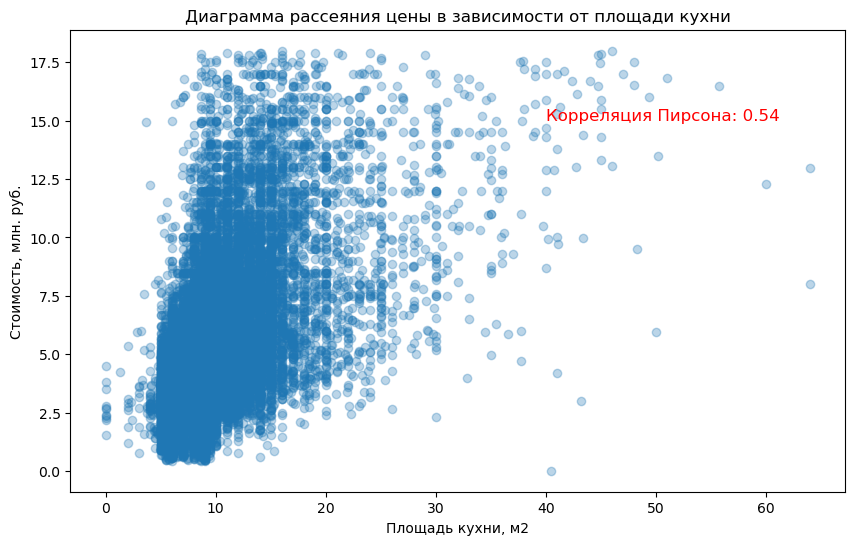

In [76]:
# Строим диаграмму рассеяния
plt.figure(figsize=(10, 6))
plt.scatter(data['kitchen_area'], data['last_price'], alpha=0.3)
plt.title('Диаграмма рассеяния цены в зависимости от площади кухни')
plt.xlabel('Площадь кухни, м2')
plt.ylabel('Стоимость, млн. руб.')
plt.text(40, 15, f'Корреляция Пирсона: {correlation_kitchen:.2f}', fontsize=12, color='red')
plt.show()

Средняя цена 1 кв.м площади кухни 6.2 млн. руб., медиана около 5.3 млн., минимальная цена 0 руб., это говорит о том, что есть доля квартир-студий без кухни. 
Коэффициент корреляции 0.54 между площадью кухни и последней ценой, указывает на умеренную положительную корреляцию между этими двумя переменными

##### Зависимость цены от количества комнат

In [77]:
# Создаем сводную таблицу с медианными ценами для каждого количества комнат
price_rooms = data.pivot_table(index='rooms', values='last_price', aggfunc='median')
print(price_rooms.head(5))
print()


       last_price
rooms            
1           3.600
2           4.750
3           5.999
4           7.810
5          10.800



In [78]:
print(price_rooms.describe())

       last_price
count    9.000000
mean    10.505444
std      5.184923
min      3.600000
25%      5.999000
50%     10.800000
75%     15.000000
max     17.500000


<Axes: >

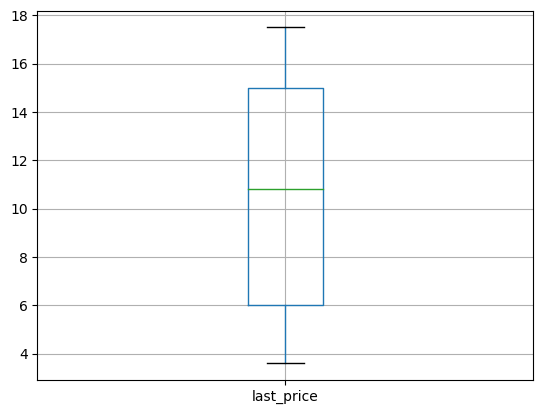

In [79]:
price_rooms.boxplot()

In [80]:
# Посчитаем корреляцию Пирсона
correlation_rooms = data['rooms'].corr(data['last_price'])
print(correlation_rooms)

0.49557036744056787


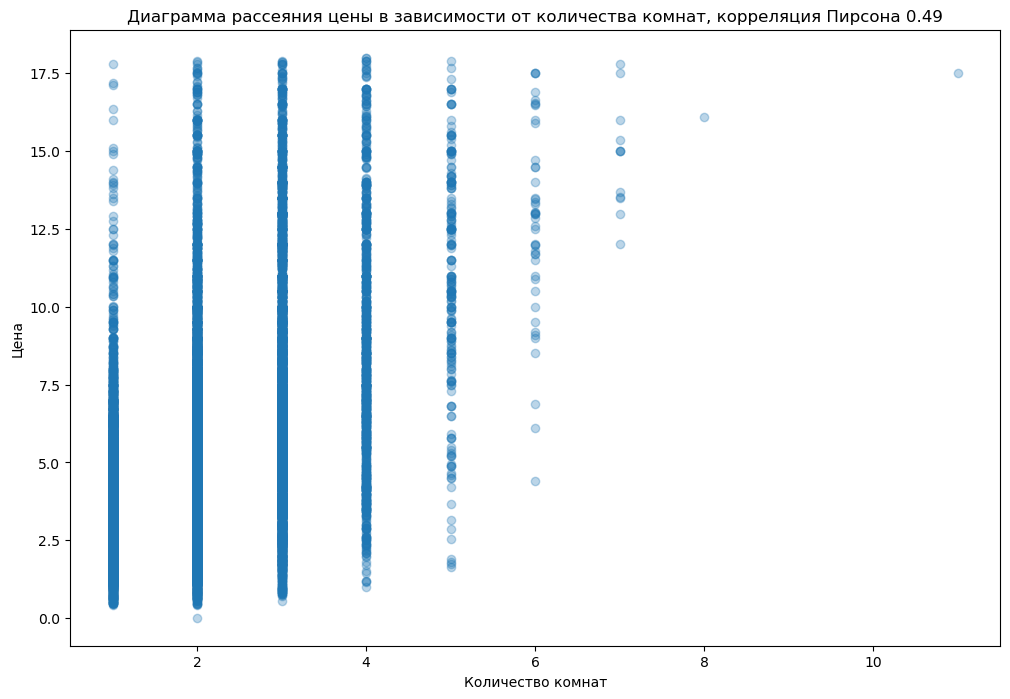

In [81]:
plt.figure(figsize=(12, 8))  # Примерно стандартный размер
plt.scatter(data['rooms'], data['last_price'], alpha=0.3)
plt.title('Диаграмма рассеяния цены в зависимости от количества комнат, корреляция Пирсона 0.49')
plt.xlabel('Количество комнат')
plt.ylabel('Цена')
plt.show()

Цены на 2-х и 3-х комнатные квартиры достаточно равномерны, для однокомнатных квартир есть разброс в интервале дороже 8.00 млн., что объясняется тем, что это уже не типичная цена для 1-комнантной квартиры Для 4-х комнатных аналогичная ситуация, там есть разброс выше 12.00 млн. Для квартир более 5-ти комнат достаточно большой разброс, но их доля в продаже мала

Корреляция Пирсона 0.49 указывает на умеренную положительную линейную корреляцию между двумя переменными, это означает, что при увеличении размера кухни цена недвижимости умеренно увеличивается

[Зависимость цены от даты размещения](#plot)

##### Зависимость цены от этажа квартиры

In [82]:
import matplotlib.pyplot as plt
# Выбираем только квартиры на этаже "другой"
floor_another = data[data['floor_type'] == 'другой']


In [83]:
# Группируем данные по этажам и вычисляем среднюю цену
average_price_by_floor_another = floor_another.groupby('floor')['last_price'].mean()
print(average_price_by_floor_another.head(5))

floor
2    5.378316
3    5.437056
4    5.291797
5    5.883286
6    5.613007
Name: last_price, dtype: float64


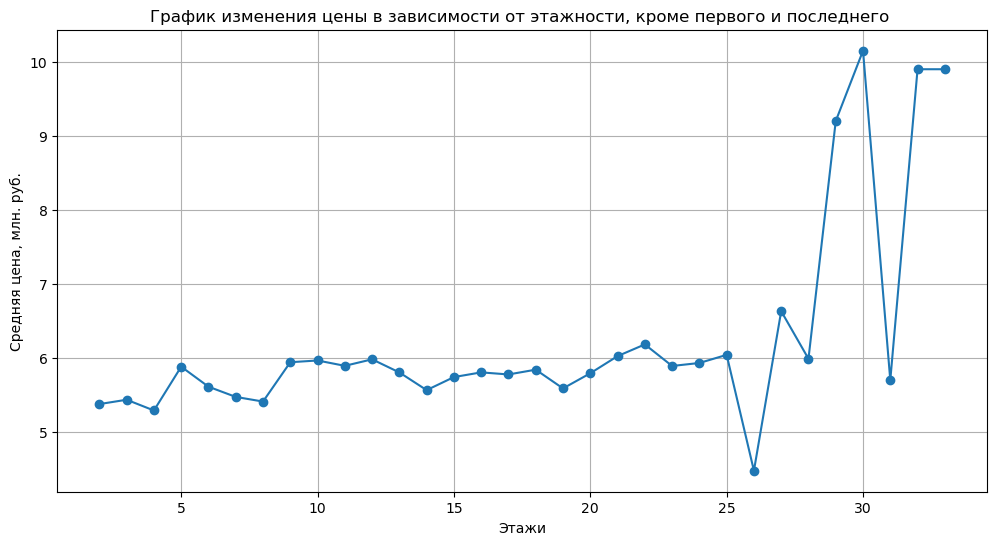

In [84]:
# Строим график изменения средней цены для 2-24 этажей
plt.figure(figsize=(12, 6))
plt.plot(average_price_by_floor_another.index, average_price_by_floor_another.values, marker='o', linestyle='-')
plt.grid(True)
plt.xlabel('Этажи')
plt.ylabel('Средняя цена, млн. руб.')
plt.title('График изменения цены в зависимости от этажности, кроме первого и последнего ')
plt.show()




Средняя цена квартир, расположенных на 2-24 этажа примерно одинаковая - 5-6 млн. руб. Для более высоких этажей идет большой разброс цены, что нужно проанализировать дополнительно

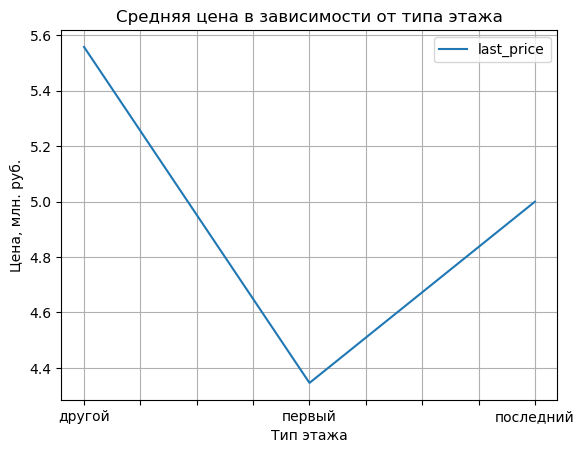

In [85]:
# Строим график распределения цены от типа этажа
data.pivot_table(index='floor_type', values='last_price', aggfunc='mean').plot()
plt.grid(True)
plt.xlabel('Тип этажа')
plt.ylabel('Цена, млн. руб.')
plt.title('Средняя цена в зависимости от типа этажа')
plt.show()

Самая низкая цена на квартиры на 1-м этаже, далее идут квартиры на последнем этаже и квартиры на 2-24 этажах

In [86]:
# Квартиры на этаже "первый"
floor_first = data[data['floor_type'] == 'первый']

In [87]:
print(floor_first['floor_type'].describe())

count       2843
unique         1
top       первый
freq        2843
Name: floor_type, dtype: object


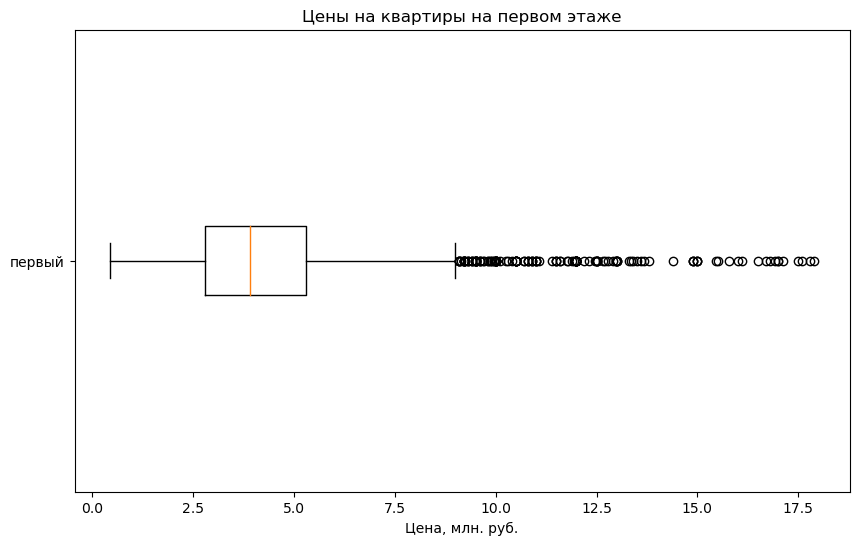

In [88]:
plt.figure(figsize=(10, 6))
plt.boxplot(floor_first['last_price'], labels=['первый'], vert=False)
plt.title('Цены на квартиры на первом этаже')
plt.xlabel('Цена, млн. руб.')
plt.show()

Квартиры на первом этаже составляют чуть более 1 % от всех продаж, медианна около 3.5-3.7 млн. руб., есть большая доля выбросов в зоне максимума, возможно это квартиры более дорогого сегмента, может быть квартиры в коттеджных поселках

In [89]:
# Квартиры на этаже "последний"
floor_last = data[data['floor_type'] == 'последний']

In [90]:
print(floor_last['floor_type'].describe())

count          3143
unique            1
top       последний
freq           3143
Name: floor_type, dtype: object


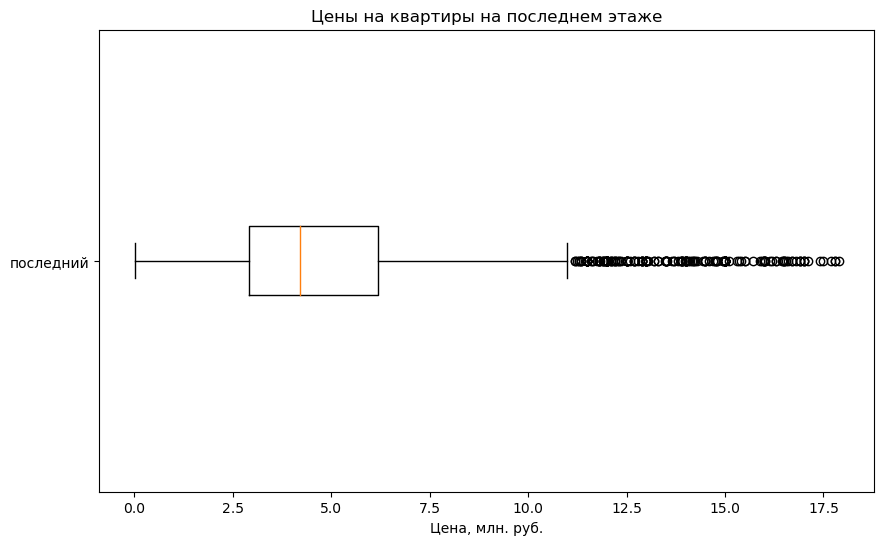

In [91]:
plt.figure(figsize=(10, 6))
plt.boxplot(floor_last['last_price'], labels=['последний'], vert=False)
plt.title('Цены на квартиры на последнем этаже')
plt.xlabel('Цена, млн. руб.')
plt.show()

Квартир на последнем этаже чуть больше,чем на первом, но примерно столько же, медиана чуть больше 3.8-4.0 млн. руб, доля более дорогих квартир больше, чем доля более дешевых. Выбросы в зоне максимума могут свидетельствовать о продаже пентхаусов

<a id='plot'></a>

#### Зависимость цены от даты размещения

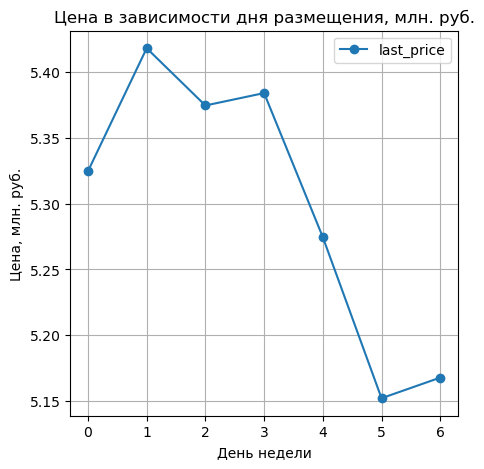

In [92]:
# Зависимость цены от дня размещения
data.pivot_table(index='day_exp', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.grid(True)
plt.xlabel('День недели')
plt.ylabel('Цена, млн. руб.')
plt.title('Цена в зависимости дня размещения, млн. руб.')
plt.show() 


Пик продаж приходится на вторник, минимальные продажи в выходные. В середине недели продажи примерно одинаковы

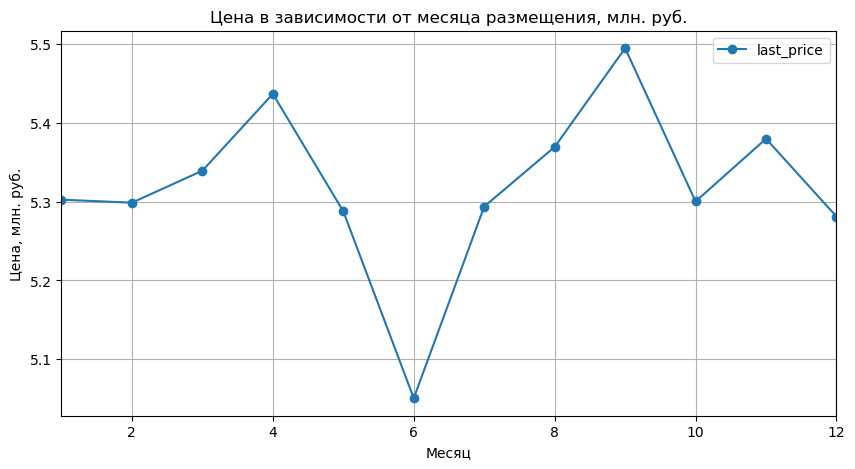

In [93]:

# Зависимость от месяца размещения 
data.pivot_table(index='month_exp', values='last_price').plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5)) 
plt.grid(True)
plt.xlabel('Месяц')
plt.ylabel('Цена, млн. руб.')
plt.title('Цена в зависимости от месяца размещения, млн. руб.')
plt.show()


Видно что с апреля по июнь идёт снижение продаж, самое большое падение в июне. Пик спроса в сентябре, что логично - летом спрос на квартиры всегда падает, а с началом учебного года вырастает

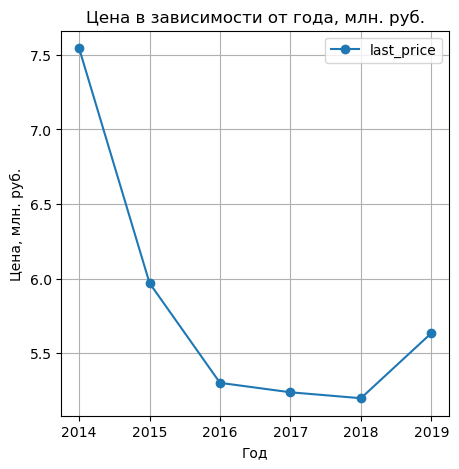

In [94]:
# Зависимость от года размещения 
data.pivot_table(index='year_exp', values='last_price').plot(grid=True, style='o-', figsize=(5, 5)) 
plt.grid(True)
plt.xlabel('Год')
plt.ylabel('Цена, млн. руб.')
plt.title('Цена в зависимости от года, млн. руб.')
plt.show()

Начиная с 2014 до 2016 года на рынке недвижимости было резкое падение. Затем падение замедлилось, но вплоть до 2018 года наблюдается снижение цен. В 2018 году цена достигла минимума, затем начинается небольшой рост.

### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22485 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22485 non-null  int64         
 1   last_price            22485 non-null  float64       
 2   total_area            22485 non-null  float64       
 3   first_day_exposition  22485 non-null  datetime64[ns]
 4   rooms                 22485 non-null  int64         
 5   ceiling_height        22485 non-null  float64       
 6   floors_total          22485 non-null  int64         
 7   living_area           22485 non-null  float64       
 8   floor                 22485 non-null  int64         
 9   is_apartment          22485 non-null  bool          
 10  studio                22485 non-null  bool          
 11  open_plan             22485 non-null  bool          
 12  kitchen_area          22485 non-null  float64       
 13  balcony              

In [96]:
top_10_median = (data.groupby('locality_name').agg({'last_price':'count', 'metr_price':'median'}).sort_values(by='last_price', ascending=False).head(10))
print(top_10_median)

                   last_price  metr_price
locality_name                            
Санкт-Петербург         14696    100000.0
посёлок Мурино            525     80000.0
Кудрово                   449    100000.0
посёлок Шушары            435     80000.0
Всеволожск                391     70000.0
Пушкин                    359    100000.0
Колпино                   337     70000.0
посёлок Парголово         322     90000.0
Гатчина                   306     70000.0
Выборг                    236     60000.0


In [97]:
top_10_mean = (data.groupby('locality_name').agg({'last_price':'count', 'metr_price':'mean'}).sort_values(by='last_price', ascending=False).head(10))
print(top_10_mean)

                   last_price     metr_price
locality_name                               
Санкт-Петербург         14696  107991.290147
посёлок Мурино            525   85238.095238
Кудрово                   449   94988.864143
посёлок Шушары            435   78436.781609
Всеволожск                391   67289.002558
Пушкин                    359  101977.715877
Колпино                   337   75281.899110
посёлок Парголово         322   90714.285714
Гатчина                   306   68954.248366
Выборг                    236   57838.983051


Самое востребованное жилье в Санкт-Петербурге, что вполне логично. Далее идут бывшие окраины, а ныне спальные районы Санкт-Петербурга - Мурино, Кудрово, Шушары, Колпино, Всеволожск, Колпино, Парголово.  Пушкин не является спальным районом, но это элитное место, бывшая царская резиденция и жилье там ненамного дешевле, чем в СПб. Гатчина и Выборг - крупные города в Ленинградской области в хорошей транспортной доступности, с развитой инфраструктурой.
 

### Выделим квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислим их среднюю стоимость на разном удалении от центра

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22485 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22485 non-null  int64         
 1   last_price            22485 non-null  float64       
 2   total_area            22485 non-null  float64       
 3   first_day_exposition  22485 non-null  datetime64[ns]
 4   rooms                 22485 non-null  int64         
 5   ceiling_height        22485 non-null  float64       
 6   floors_total          22485 non-null  int64         
 7   living_area           22485 non-null  float64       
 8   floor                 22485 non-null  int64         
 9   is_apartment          22485 non-null  bool          
 10  studio                22485 non-null  bool          
 11  open_plan             22485 non-null  bool          
 12  kitchen_area          22485 non-null  float64       
 13  balcony              

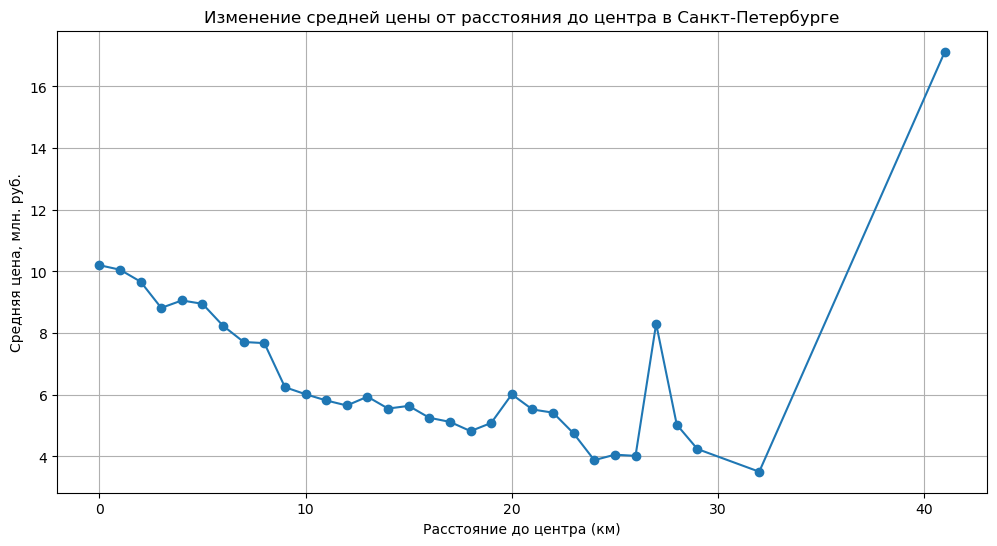

In [99]:
# Выбираем только квартиры в Санкт-Петербурге
spb_flats = data[data['locality_name'] == 'Санкт-Петербург']

# Вычисляем среднюю цену для каждого километра от центра
average_price_by_distance = spb_flats.groupby('cityCenters_nearest')['last_price'].mean()

# Строим график изменения средней цены от расстояния до центра
plt.figure(figsize=(12, 6))
plt.plot(average_price_by_distance.index, average_price_by_distance.values, marker='o', linestyle='-')
plt.title('Изменение средней цены от расстояния до центра в Санкт-Петербурге')
plt.xlabel('Расстояние до центра (км)')
plt.ylabel('Средняя цена, млн. руб.')
plt.grid(True)
plt.show()

Средняя цена уменьшается по мере удаления от центра, что вполне логично, далее идет резкий скачок, это вероятно цена квартир в Пушкине - элитном пригороде Санкт-Петербурга

### Общий вывод

### На основании полученных данных можно сделать можно сделать следующий вывод: 
больше всего квартир продается в Санкт-Петербурге; квартиры в Пушкине стоят почти столько же, как и в Петербурге, т. к. это элитный пригород. Квартиры на первом и последнем этажах составляют суммарно чуть более 10 %. Однокомнатные квартиры продаются больше всего, затем идут двух- и трех- комнатные. В среднем квартиры продаются за 2.5 месяца. Наименьшая цена на квартиры была в августе 2016 года, после 2018 года наблюдается устойчивый тренд на повышение.

Результаты исследования:

- Площадь квартир:

Однокомнатные и двухкомнатные квартиры преобладают на рынке.
Большие трехкомнатные квартиры также востребованы, но спрос на них снижается с увеличением площади.

- Цены на квартиры:

Основная часть продаваемых квартир находится в ценовом диапазоне от 3.5 до 5 млн. рублей.
Вторыми по популярности являются квартиры до 2.5 млн. рублей и двушки по цене 6-8 млн. рублей.

- Высота потолков:

Наиболее популярны квартиры с потолками 2.75 м и 2.5 м.
Высокие потолки (3 м и выше) имеют свой спрос, но доля таких квартир меньше.

- Этаж и количество этажей:

Квартиры на первом и последнем этажах продаются примерно в одинаковом количестве.
Большинство квартир продаются в 5-этажных домах, что может быть связано с их большим количеством.

- Расстояние от центра:

Большинство квартир продаются в пределах 12-18 км от центра, что соответствует плотной городской застройке.

- Время продажи:

В среднем квартиры продаются в течение 1,5-3 месяцев.
Доля быстрых  продаж до 1,5 месяцев - 25 %.
Доля долгих продаж более 7 месяцев - 75 %.

- Динамика цен:

Наблюдается рост цен с 2018 года после резкого падения с 2014 года.

- Локации:

Санкт-Петербург и спальные районы являются наиболее востребованными местами для покупки жилья.
Также популярны Пушкин, Гатчина и Выборг.

Рекомендации для бизнеса:

Сосредотачивайте внимание на однокомнатные и двухкомнатные квартиры, так как они составляют основную часть рынка.
При разработке новых проектов учтите популярность квартир в диапазоне 30-52 кв. м.
Проведите анализ рынка в зависимости от высоты потолков и этажности домов для более точного понимания предпочтений покупателей.
Обратите внимание на цены в зависимости от расстояния от центра и локации.